# Dependencies Loading

In [146]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import pickle
from joblib import dump, load

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

np.random.seed(2024)
pd.set_option("display.max_columns", 500)

## Loading models

In [111]:
lr = load('../models/Logistic_Regression.joblib')
knn = load('../models/KNeighborsClassifier.joblib')
clf = load('../models/SupportVectorClassification.joblib')
rf = load('../models/RandomForestClassifier.joblib')

## Loading test data

In [112]:
data_test = pd.read_csv('../input_data/fe_X_test.csv',index_col=0)
y_test = pd.read_csv('../input_data/y_test.csv',index_col=0)
sca_data_test = pd.read_csv('../input_data/scal_fe_X_test.csv',index_col=0)

In [113]:
data_test

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Gender_M,MS_Married,MS_Single,ln_Total_Trans_Amt,ln_Credit_Limit,ln_Avg_Transaction,Avg_Transaction,Credit_utilization
0,56.0,2.0,0.0,0.0,0.0,42.0,4.0,2.0,2.0,3495.0,1427.0,2068.0,0.563,4466.0,85.0,0.889,0.408,0.0,0.0,False,False,False,8.404248,8.159089,3.961597,52.541176,0.149044
1,47.0,4.0,2.0,1.0,0.0,35.0,6.0,1.0,2.0,3560.0,751.0,2809.0,1.096,4060.0,79.0,0.975,0.211,0.0,0.0,False,False,False,8.308938,8.177516,3.939490,51.392405,0.066555
2,42.0,2.0,0.0,2.0,0.0,32.0,5.0,5.0,3.0,4708.0,0.0,4708.0,0.718,4597.0,89.0,0.679,0.000,0.0,1.0,False,False,False,8.433159,8.457018,3.944523,51.651685,0.178490
3,45.0,4.0,3.0,0.0,0.0,38.0,2.0,2.0,1.0,2396.0,887.0,1509.0,0.604,7480.0,84.0,0.787,0.370,0.0,0.0,False,False,False,8.919988,7.781556,4.489171,89.047619,0.514496
4,51.0,3.0,3.0,0.0,0.0,30.0,3.0,2.0,0.0,6006.0,1576.0,4430.0,0.504,3199.0,65.0,0.548,0.262,1.0,0.0,False,False,False,8.070594,8.700514,3.896206,49.215385,0.042792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,48.0,4.0,3.0,1.0,0.0,40.0,3.0,3.0,3.0,2300.0,1906.0,394.0,0.803,4538.0,71.0,0.868,0.829,0.0,1.0,False,False,False,8.420242,7.740664,4.157562,63.915493,0.472780
2022,37.0,2.0,1.0,0.0,0.0,28.0,5.0,2.0,1.0,7411.0,633.0,6778.0,0.762,2761.0,77.0,0.604,0.085,0.0,0.0,False,False,False,7.923348,8.910721,3.579543,35.857143,0.000000
2023,32.0,0.0,4.0,2.0,0.0,25.0,6.0,2.0,2.0,4469.0,2331.0,2138.0,1.006,8314.0,67.0,0.763,0.522,0.0,0.0,True,True,False,9.025696,8.404920,4.821004,124.089552,0.016989
2024,54.0,2.0,3.0,0.0,0.0,45.0,5.0,2.0,4.0,2683.0,1671.0,1012.0,0.784,1406.0,37.0,0.423,0.623,0.0,0.0,True,True,False,7.248504,7.894691,3.637586,38.000000,0.101143


In [114]:
y_test

,Attrition_Flag
8061,0
4318,0
7714,0
9015,0
3608,0
...,...
7301,0
2566,0
9747,1
1692,0


In [115]:
sca_data_test

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Gender_M,MS_Married,MS_Single,ln_Total_Trans_Amt,ln_Credit_Limit,ln_Avg_Transaction,Avg_Transaction,Credit_utilization
0,1.282105,-0.298120,-1.662661,-1.055703,-0.254378,0.802416,0.270581,-0.514830,-0.635643,-0.542249,0.515630,-0.592564,-0.810789,0.185091,1.255258,1.024673,0.647128,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,0.558114,-0.428992,-0.320276,-0.399508,-0.288025
1,0.064089,1.349892,-0.090184,-0.282623,-0.254378,-0.142324,1.614713,-1.589744,-0.635643,-0.535132,-0.239953,-0.511467,1.756614,0.052646,0.985979,1.392904,-0.064285,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,0.413632,-0.409539,-0.382679,-0.442541,-0.585914
2,-0.612586,-0.298120,-1.662661,0.490456,-0.254378,-0.547213,0.942647,2.709912,0.316978,-0.409452,-1.079364,-0.303635,-0.064171,0.227826,1.434778,0.125504,-0.826254,-0.460763,3.073315,-0.931313,-1.060200,-0.803399,0.601940,-0.114472,-0.368473,-0.432829,-0.181687
3,-0.206581,1.349892,0.696055,-1.055703,-0.254378,0.262564,-1.073551,-0.514830,-1.588265,-0.662564,-0.087942,-0.653742,-0.613296,1.168316,1.210379,0.587934,0.509901,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,1.339930,-0.827548,1.168954,0.968022,1.031726
4,0.605430,0.525886,0.696055,-1.055703,-0.254378,-0.817139,-0.401485,-0.514830,-2.540887,-0.267351,0.682171,-0.334060,-1.094985,-0.228229,0.357660,-0.435406,0.119888,2.529741,-0.374219,-0.931313,-1.060200,-0.803399,0.052322,0.142583,-0.504860,-0.524092,-0.671730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0.199425,1.349892,0.696055,-0.282623,-0.254378,0.532490,-0.401485,0.560084,0.316978,-0.673074,1.051020,-0.775770,0.345265,0.208579,0.626940,0.934756,2.167456,-0.460763,3.073315,-0.931313,-1.060200,-0.803399,0.582358,-0.870717,0.232891,0.026573,0.881078
2022,-1.289261,-0.298120,-0.876422,-1.055703,-0.254378,-1.087064,0.942647,-0.514830,-1.588265,-0.113535,-0.371844,-0.077089,0.147772,-0.371113,0.896219,-0.195628,-0.519300,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,-0.170889,0.364495,-1.398734,-1.024492,-0.826263
2023,-1.965936,-1.946132,1.482293,0.490456,-0.254378,-1.491953,1.614713,-0.514830,-0.635643,-0.435617,1.526054,-0.584903,1.323093,1.440383,0.447420,0.485171,1.058808,-0.460763,-0.374219,1.073753,0.943218,-0.803399,1.500174,-0.169472,2.105645,2.280691,-0.764911
2024,1.011435,-0.298120,0.696055,-1.055703,-0.254378,1.207304,0.942647,-0.514830,1.269600,-0.631144,0.788355,-0.708135,0.253744,-0.813140,-0.898977,-0.970625,1.423542,-0.460763,-0.374219,1.073753,0.943218,-0.803399,-1.193894,-0.708113,-1.234890,-0.944220,-0.461009


# Models

In [116]:
FE_columns = ['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Education_Level_NA',
 'Income_Category_NA',
 'Gender_M',
 'MS_Married',
 'MS_Single',
 'ln_Total_Trans_Amt',
 'ln_Credit_Limit',
 'ln_Avg_Transaction',
 'Credit_utilization']

In [117]:
def scores(model,y_true,y_pred):
    return {"model":model,
    "f1_score":[f1_score(y_true,y_pred)],
    "matthews_corrcoef":[matthews_corrcoef(y_true,y_pred)],
    "roc_auc":[roc_auc_score(y_true,y_pred)]
    }
    

## Logistic Regression

In [189]:
lr

LogisticRegression(C=1, max_iter=5000)

In [190]:
pred = pd.DataFrame(lr.predict(data_test), columns=["LR_pred"])

In [191]:
pred['LR_proba'] = pd.DataFrame(lr.predict_proba(data_test)[:,1])

In [194]:
pred['true'] = y_test.values

In [195]:
pd.DataFrame(scores('Logistic Regression',y_test,pred['LR_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,Logistic Regression,0.665706,0.598704,0.81482


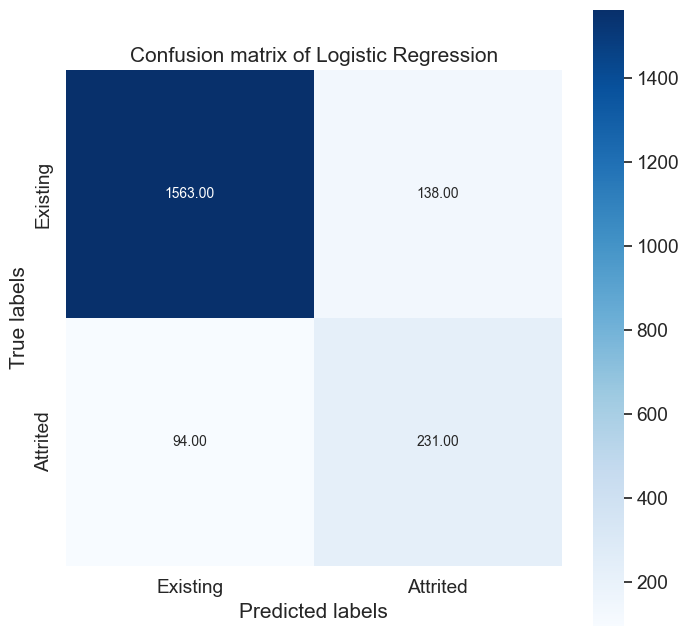

In [196]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['LR_pred']),annot=True, square=True, fmt=".2f", annot_kws={"size": 10},cmap = 'Blues')
plt.title("Confusion matrix of Logistic Regression")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

## KNN

In [197]:
knn

KNeighborsClassifier(n_neighbors=2)

In [198]:
pred['KNN_pred'] = pd.DataFrame(knn.predict(sca_data_test))
pred['KNN_proba'] = pd.DataFrame(knn.predict_proba(sca_data_test)[:,1])

In [199]:
pd.DataFrame(scores('KNN',y_test,pred['KNN_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,KNN,0.653571,0.610291,0.766253


In [200]:
confusion_matrix(pred["true"], pred['KNN_pred'])/pred.shape[0]

array([[0.81391905, 0.02566634],
       [0.07008885, 0.09032577]])

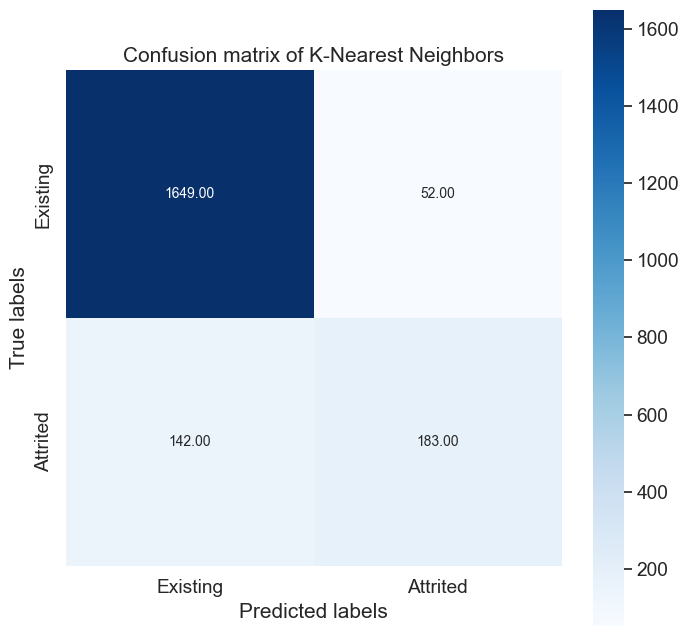

In [201]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['KNN_pred']),annot=True, square=True, fmt=".2f", annot_kws={"size": 10},cmap = 'Blues')
plt.title("Confusion matrix of K-Nearest Neighbors")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

## SVC

In [202]:
clf

SVC(C=10, gamma=0.1, probability=True)

In [203]:
pred['SVC_pred'] = pd.DataFrame(clf.predict(sca_data_test))
pred['SVC_proba'] = pd.DataFrame(clf.predict_proba(sca_data_test)[:,1])

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [204]:
pd.DataFrame(scores('SVC',y_test,pred['SVC_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,SVC,0.75,0.717414,0.82202


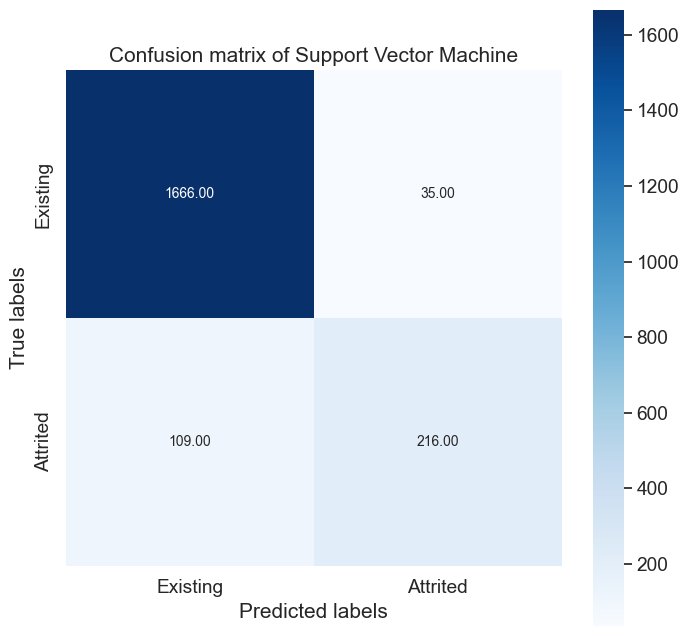

In [205]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['SVC_pred']),annot=True, square=True, fmt=".2f", annot_kws={"size": 10},cmap = 'Blues')
plt.title("Confusion matrix of Support Vector Machine")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

## Random Forest

In [206]:
rf

RandomForestClassifier(random_state=2024)

In [207]:
pred['RF_pred'] = pd.DataFrame(rf.predict(data_test[FE_columns]))
pred['RF_proba'] = pd.DataFrame(rf.predict_proba(data_test[FE_columns])[:,1])

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [208]:
pd.DataFrame(scores('RF',y_test,pred['RF_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,RF,0.866769,0.841186,0.922157


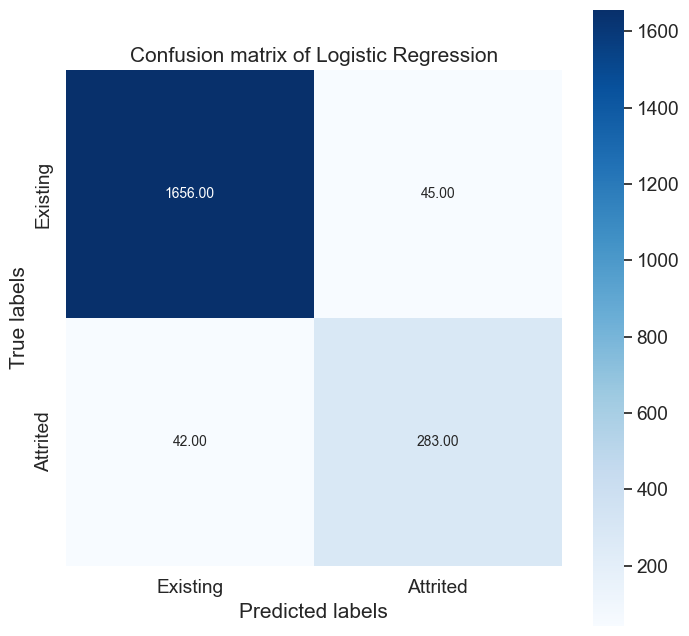

In [209]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['RF_pred']),annot=True, square=True, fmt=".2f", annot_kws={"size": 10},cmap = 'Blues')
plt.title("Confusion matrix of Logistic Regression")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

# Model comparision

In [210]:
results = pd.concat([pd.DataFrame(scores('Logistic Regression',y_test,pred['LR_pred'])),
           pd.DataFrame(scores('KNN',y_test,pred['KNN_pred'])),
           pd.DataFrame(scores('SVC',y_test,pred['SVC_pred'])),
           pd.DataFrame(scores('RF',y_test,pred['RF_pred']))
           ])

In [211]:
results

,model,f1_score,matthews_corrcoef,roc_auc
0,Logistic Regression,0.665706,0.598704,0.814820
0,KNN,0.653571,0.610291,0.766253
0,SVC,0.750000,0.717414,0.822020
0,RF,0.866769,0.841186,0.922157


In [212]:
pred

,LR_pred,LR_proba,true,KNN_pred,KNN_proba,SVC_pred,SVC_proba,RF_pred,RF_proba
0,0,0.002123,0,0,0.0,0,1.000000e-07,0,0.00
1,0,0.000706,0,0,0.0,0,1.440162e-04,0,0.00
2,0,0.034957,0,0,0.0,0,1.225184e-04,0,0.09
3,0,0.030988,0,0,0.0,0,3.893709e-07,0,0.01
4,0,0.009707,0,0,0.0,0,2.080741e-03,0,0.03
...,...,...,...,...,...,...,...,...,...
2021,0,0.066721,0,0,0.0,0,2.566181e-04,0,0.00
2022,0,0.001205,0,0,0.5,0,2.770779e-05,0,0.11
2023,0,0.396426,1,1,1.0,1,9.504737e-01,1,0.78
2024,1,0.610951,0,0,0.5,0,2.825300e-03,0,0.16
